In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

In [2]:
INPUT_FILE_PATH = "https://raw.githubusercontent.com/RPDUD/Water_Quality/main/water_potability.csv"
df = pd.read_csv(INPUT_FILE_PATH)
display(df.head())

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [4]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

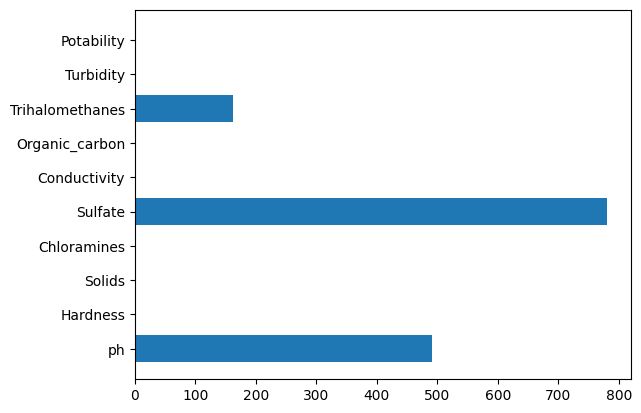

In [7]:
x = np.array(df.columns)
y = np.array(df.isnull().sum())

plt.barh(x,y)
plt.show()

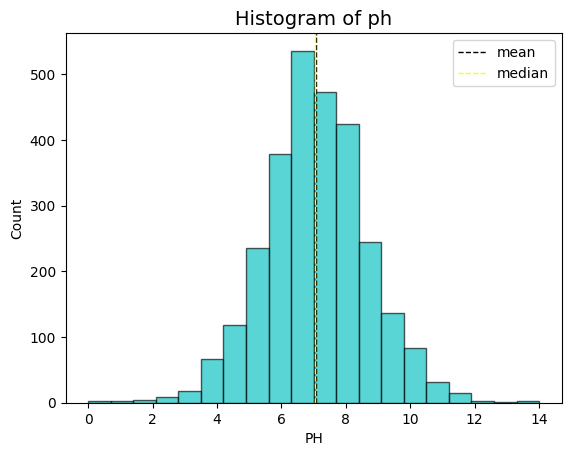

In [8]:
result = plt.hist(df['ph'], bins=20, color='c', edgecolor='k', alpha=0.65)

plt.axvline(df['ph'].mean(), color='black', linestyle='dashed', linewidth=1, label = "mean")
plt.axvline(df['ph'].median(), color='yellow', linestyle='dashed', linewidth=1, label = "median")
plt.xlabel("PH")
plt.ylabel("Count")
plt.title("Histogram of ph", size=14)
plt.legend(["mean", "median"])

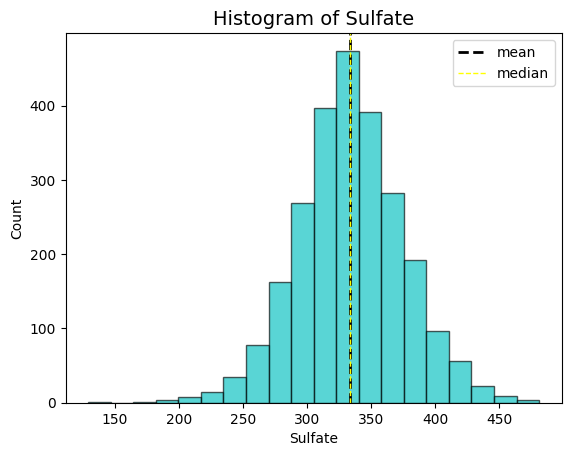

In [9]:
result = plt.hist(df['Sulfate'], bins=20, color='c', edgecolor='k', alpha=0.65)

plt.axvline(df['Sulfate'].mean(), color='black', linestyle='dashed', linewidth=2, label = "mean")
plt.axvline(df['Sulfate'].median(), color='yellow', linestyle='dashed', linewidth=1, label = "median")
plt.xlabel("Sulfate")
plt.ylabel("Count")
plt.title("Histogram of Sulfate", size=14)
plt.legend(["mean", "median"]);

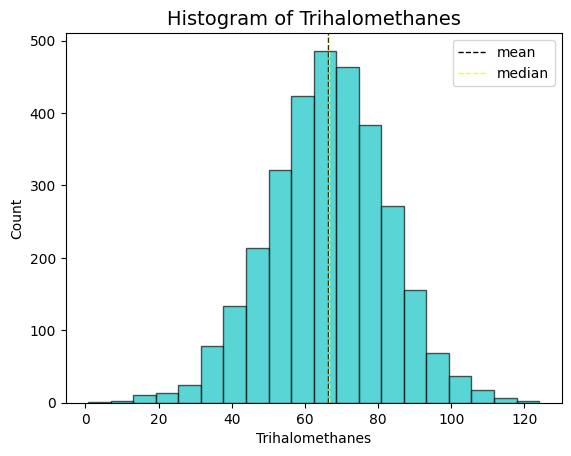

In [10]:
result = plt.hist(df['Trihalomethanes'], bins=20, color='c', edgecolor='k', alpha=0.65)

plt.axvline(df['Trihalomethanes'].mean(), color='black', linestyle='dashed', linewidth=1, label = "mean")
plt.axvline(df['Trihalomethanes'].median(), color='yellow', linestyle='dashed', linewidth=1, label = "median")
plt.xlabel("Trihalomethanes")
plt.ylabel("Count")
plt.title("Histogram of Trihalomethanes", size=14)
plt.legend(["mean", "median"]);

In [11]:
df['ph'] = df['ph'].fillna(df['ph'].mean())

In [12]:
df.isnull().sum()

ph                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [13]:
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

In [14]:
q1, q3 = np.percentile(df['ph'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
outliers = df['ph'][(df['ph'] < lower_bound) | (df['ph'] > upper_bound)]
print(outliers)

1        3.716080
9       11.180284
26       3.445062
32      10.433291
36       3.641630
          ...    
3233    10.485604
3246    10.667364
3249    10.808157
3261     3.629922
3269    11.491011
Name: ph, Length: 142, dtype: float64


In [15]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


In [16]:
df.skew()

ph                 0.027796
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.041184
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.085161
Turbidity         -0.007817
Potability         0.450784
dtype: float64

In [17]:
count = 0
for i in df.skew():
    if i > 0.7 or i < -0.7:
        count += 1
print("Number of skewed columns: {}".format(count))

Number of skewed columns: 0


In [18]:
df["Potability"].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [19]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [20]:
data_train = df.drop(["Potability"], axis = 1)

In [21]:
data_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658


In [22]:
from sklearn.preprocessing import RobustScaler
 
scaler = RobustScaler()
df_scaled = scaler.fit_transform(data_train.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=data_train.columns)
df_scaled["Potability"] = df["Potability"]

In [23]:
df_scaled.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.000000,0.198981,-0.011702,0.085492,1.043542,1.227178,-0.854560,1.028759,-0.935210,0
1,-2.113014,-1.696382,-0.196962,-0.249088,0.000000,1.473406,0.214093,-0.502884,0.514449,0
2,0.639503,0.684850,-0.087287,1.079558,0.000000,-0.028251,0.590024,0.001189,-0.847715,0
3,0.776180,0.437145,0.093483,0.467446,0.694190,-0.505079,0.939076,1.695662,0.635242,0
4,1.263161,-0.398477,-0.252771,-0.293690,-0.710100,-0.202262,-0.592197,-1.718287,0.113188,0


In [24]:
df.to_csv("data_clean.csv")

In [25]:
re = df.cov().to_numpy()
cov = re[0][2]
ph_std = df['ph'].std()
Solids_std = df['Solids'].std()
r = np.divide(cov,np.multiply(ph_std, Solids_std))
n = len(df['ph'])
t = np.multiply(r, np.sqrt(np.divide(np.subtract(n,2),np.subtract(1,np.square(r)))))
print("With t = {} so the area of p-value is equal to 0.015 < 0.05\n-> we rejecting the null hypothesis at 5% significance level".format(t))

With t = -4.701080688729191 so the area of p-value is equal to 0.015 < 0.05
-> we rejecting the null hypothesis at 5% significance level
